# Titanic: Machine Learning from Disaster

# 案例介绍
    泰坦尼克号的沉没是历史上伤亡人数最多、影响最深远的沉船事件之一。1912年4月15日，泰坦尼克号与冰山相撞，2224名乘客和船员中有1502人丧生。这场轰动性的悲剧震惊了国际社会，但也因此产生了更好的船舶安全法规。这次海难造成人员伤亡的原因之一是没有足够的救生艇供乘客和船员使用。
    
    虽然在沉船中幸存下来有一些运气因素，但有些人比其他人更可能存活下来。在本次学习中，在给定的部分存活人员信息中，将应用python来分析哪些乘客可能在悲剧中存活。此次，棕榈学院将携手Yiyu导师给各位想学习Python、想要在数据行业继续发展学习的同学来讲授如何完成这样一个project，相信会对你们的数据分析技能的提升大有裨益。

# 第二节课

## 数据清理&数据可视化

In [21]:
#载入numpy数据包，以np来简化命名；numpy系统是Python的一种开源的数值计算扩展,这种工具可用来存储和处理大型矩阵.
import numpy as np

In [22]:
#查看训练集的末尾几行，当然Python中，默认打印是5行
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [23]:
#判断数据集里每一个数据变量的缺失值有多少个，我们可以看到Cabin这个变量的缺失值是最多的；
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# 填充Embarked中的missing value
train_df['Embarked'] = train_df['Embarked'].fillna(method = 'ffill')
# 计算Age中各值出现的次数，normalize=Treue表示将结果归一化到[0,1]上
s = train_df['Age'].value_counts(normalize = True)

In [27]:
#train_df['Age'].interpolate(method='linear', inplace=True)

In [28]:
# 判断每一个人的年龄数据是否为空
missing_age = train_df['Age'].isnull()
# 此处使用numpy.random的choice方法，以各年龄出现的频次为概率从所有年龄中选取缺失的年龄数目个年龄值
# 将这些随机选中的年龄值赋给缺失的年龄值
train_df.loc[missing_age,'Age'] = np.random.choice(s.index, size = len(train_df[missing_age]),p=s.values)


In [29]:
# 去掉 Ticket Cabin两列
train_df = train_df.drop(['Ticket','Cabin'], axis = 1)

In [27]:
# 使用正则表达式将Title中的称呼提取出来，如Mr.
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.',expand = False)

In [28]:
# 有的称呼可能出现多次，如 Mr Mrs，此处只显示一次
train_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [29]:
# 依据乘客的称呼和最后的生存情况创建交叉表
pd.crosstab(train_df['Title'], train_df['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [30]:
# 替换称呼来重新赋值Title,如将Lady Countess等出现频次较低的重新命名为Rare
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
# 以下作用同上
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

In [31]:
# 通过groupby进行分组，选取Title 和 Survived两列，然后使用mean()计算每一种Title的乘客的生还率
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [33]:
# 定义一个字典title_mapping，将原来Title中的值一次映射为字典里对应的值
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_df['Title'] = train_df['Title'].map(title_mapping)
# 用0来填充缺失值
train_df['Title'] = train_df['Title'].fillna(0)

In [34]:
# 查看训练集的前几行，当然Python中，默认打印是5行
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0.0


In [35]:
# 利用SibSp和Parch创建FamilySize和IsAlone
# SibSp: 兄弟姐妹/配偶的数量
# Parch：父母/孩子的数量
#IsAlone=1表明是alone的状态
#0表示不是
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = 1
train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

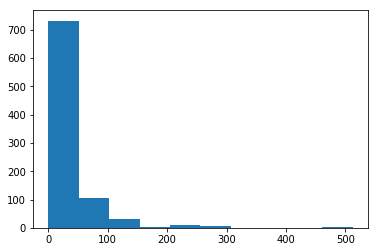

In [38]:
# 依据票价绘制直方图
plt.hist(train_df['Fare']) 

In [39]:
#利用cut把数据用25%，50%，75%进行划分
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4)

In [40]:
#利用cut把数据分成均等的五份
train_df['AgeBin'] = pd.cut(train_df['Age'], 5)

In [41]:
# 调用机器学习库scikit-learn中的LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [47]:
# 创建一个名为label_encode的LabelEncoder对象
label_encode = LabelEncoder()
# 有下列label
labels = ['Sex','Embarked','AgeBin','FareBin']

list

In [43]:
#train_df['Embarked'] = train_df['Embarked'].fillna(method = 'ffill')

In [48]:
# 遍历labels列表
for label in labels:
    # 输出每一个label和它的数据类型
    print (label,type(label))
    # 新的标签名在原标签名的基础上加上_Code
    new_label = label + '_Code'
    # 调用LabelEncoder的fit_transform方法对原train_df[label]先拟合再标准化
    train_df[new_label] = label_encode.fit_transform(train_df[label])

Sex <class 'str'>
Embarked <class 'str'>
AgeBin <class 'str'>
FareBin <class 'str'>


In [ ]:
#这里仍然是默认的查看训练集的前5行
train_df.head()

In [55]:
original_feature = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
new_feature = ['Title','FamilySize','IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']

,Title,FamilySize,IsAlone,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
0,0.0,2,0,1,2,1,0
1,0.0,2,0,0,0,2,3
2,0.0,1,1,0,2,1,1
3,0.0,2,0,0,2,2,3
4,0.0,1,1,1,2,2,1
5,0.0,1,1,1,1,1,1
6,0.0,1,1,1,2,3,3
7,0.0,5,0,1,2,0,2
8,0.0,3,0,0,2,1,1
9,0.0,2,0,0,0,0,2


In [51]:
#载入seaborn包并以sns简化命名，当你使用数据科学中的Python时，你很有可能已经用了Matplotlib,一个供你创建高质量图像的2D库。
#另一个免费的可视化库就是Seaborn,他提供了一个绘制统计图形的高级接口。Seaborn是比Matplotlib更高级的免费库，特别地以数据可视化为目标，
#Matplotlib试着让简单的事情更加简单，困难的事情变得可能，而Seaborn就是让困难的东西更加简单。
#用Matplotlib最大的困难是其默认的各种参数，而Seaborn则完全避免了这一问题。
import seaborn as sns

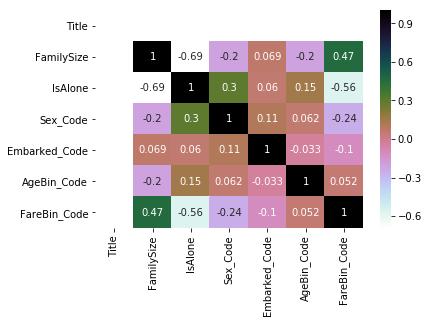

In [56]:
# 在上面，将众多属性名聚在一个list命名为new_feature
# 此处使用seaborn的heatmap方法，画出new_feature中各种特征两两之间的相似度热力图
sns.heatmap(train_df[new_feature].corr(),annot=True,cmap='cubehelix_r')